# Final Code

## Import data and packages

In [1]:
#=== pandas
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

#=== numpy
import numpy as np

#=== plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#=== others
import warnings
warnings.filterwarnings("ignore")
import math
from scipy import stats
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p drive
!google-drive-ocamlfuse drive

import os
os.chdir("/content/drive/My Drive/Colab Notebooks/digital_mkt/Final")
print(os.listdir(os.getcwd())) 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/bin/bash: google-drive-ocamlfuse: command not found
['engagement', 'subscribers', 'customer_service_reps', 'subscribers_sample.xlsx', 'customer_service_reps_sample.xlsx', 'engagement_sample.xlsx', 'Mevod final case instructions.pdf', 'drive', 'graph', 'advertising_spend_data.xlsx', 'Final_code.ipynb']


In [3]:
engagement = pd.read_pickle('engagement')
subscribers = pd.read_pickle('subscribers')
customer_service_reps = pd.read_pickle('customer_service_reps')
advertising_spend = pd.read_excel('advertising_spend_data.xlsx',header=2)

'''
• A subscriber data set, “subscribers”. Each record is a past or current subscriber to your 
service.

• A customer service representative data set “customer_service_reps”. Each record is a 
customer service representative who serves multiple subscribers.

• A product usage data set, “engagement”. Each record is a measure of product 
engagement for a given subscriber on a given date (if the subscriber had any 
engagement on that date).

• Advertising spend, “advertising spend”. Total spent per select channels per month.
'''

'\n• A subscriber data set, “subscribers”. Each record is a past or current subscriber to your \nservice.\n\n• A customer service representative data set “customer_service_reps”. Each record is a \ncustomer service representative who serves multiple subscribers.\n\n• A product usage data set, “engagement”. Each record is a measure of product \nengagement for a given subscriber on a given date (if the subscriber had any \nengagement on that date).\n\n• Advertising spend, “advertising spend”. Total spent per select channels per month.\n'

## Descriptive Analysis

### subscribers

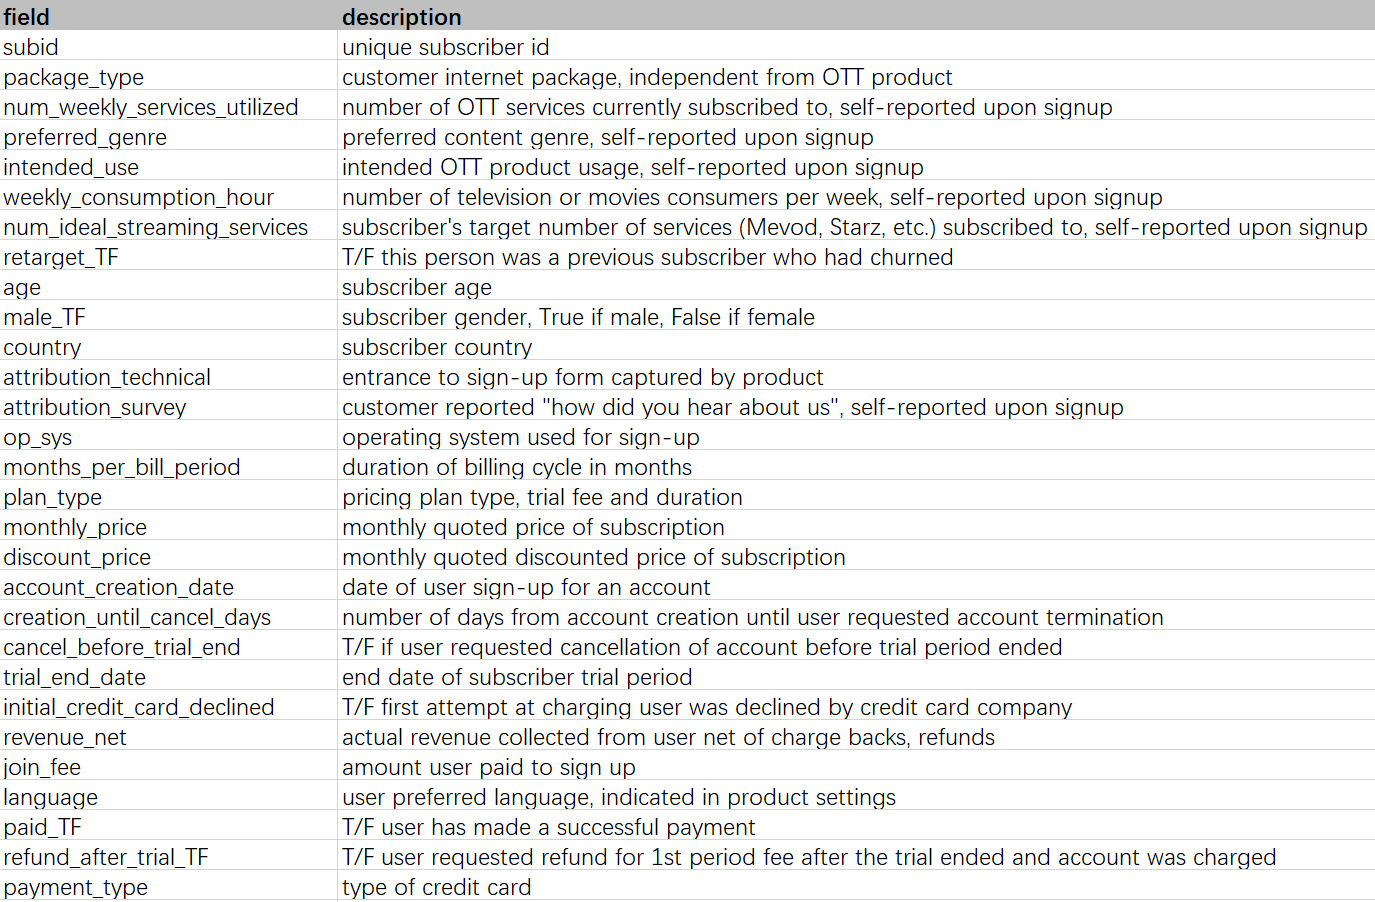

In [23]:
from IPython.display import Image
Image(filename = 'graph/subscriber.jpg', width=1000, height=600)

In [4]:
#========= Look at data
subscribers.reset_index(drop = True, inplace = True)
subscribers

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
227624,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
227626,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [5]:
#========= check whether subid is duplicated
sum(subscribers['subid'].value_counts() == 2)

'''
0
'''

#========= check the number of subid
len(subscribers['subid'].unique())

subscribers_id = subscribers['subid']
'''
227628
'''

'\n227628\n'

#####cancel related

In [6]:
#========= look at paid customers
# 'what is cancel_before_trial_end '??

current_df = subscribers[['subid','package_type','retarget_TF','plan_type',
            'account_creation_date','creation_until_cancel_days','cancel_before_trial_end','trial_end_date',
            'initial_credit_card_declined','revenue_net','paid_TF']]
current_df.head(10)

,subid,package_type,retarget_TF,plan_type,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,paid_TF
0,21724479,economy,False,base_uae_14_day_trial,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,True
1,23383224,base,False,base_uae_14_day_trial,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,False
2,26844789,enhanced,False,base_uae_14_day_trial,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,False
3,29417030,base,False,base_uae_14_day_trial,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,False
4,26723159,base,False,base_uae_14_day_trial,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,False
5,24810928,base,False,base_uae_14_day_trial,2020-03-03 20:15:43,71.0,True,2020-03-18,False,0.0000,True
6,29726122,base,False,base_uae_14_day_trial,2020-02-19 18:30:15,NaN,True,2020-03-05,False,4.5875,True
7,20299962,base,False,base_uae_14_day_trial,2020-03-05 14:52:22,NaN,True,2020-03-20,False,3.4498,True
8,24930568,base,False,base_uae_14_day_trial,2020-02-23 17:50:25,1.0,False,2020-03-09,False,0.0000,False
9,23452753,economy,False,base_uae_14_day_trial,2020-01-21 14:17:53,4.0,False,2020-02-05,False,0.0000,False


In [7]:
#========= contradiction in columns 'account_creation_date', 'creation_until_cancel_days', 'cancel_before_trial_end', and 'trial_end_date'

# current_df.loc[(current_df['creation_until_cancel_days'] > 14) & (current_df['cancel_before_trial_end'] == False),'creation_until_cancel_days'].value_counts()
# current_df.loc[(current_df['creation_until_cancel_days'] == 15)]

#==== flip 'cancel_before_trial_end'

current_df['cancel_before_trial_end'] = current_df['cancel_before_trial_end'] == False
current_df

# current_df.loc[current_df['creation_until_cancel_days'] > 14,'cancel_before_trial_end'].value_counts()

,subid,package_type,retarget_TF,plan_type,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,paid_TF
0,21724479,economy,False,base_uae_14_day_trial,2020-01-24 21:44:16,NaN,False,2020-02-08,False,NaN,True
1,23383224,base,False,base_uae_14_day_trial,2020-03-01 15:44:35,0.0,True,2020-03-16,False,0.0000,False
2,26844789,enhanced,False,base_uae_14_day_trial,2019-12-07 16:37:06,1.0,True,2019-12-22,False,0.0000,False
3,29417030,base,False,base_uae_14_day_trial,2020-01-27 16:09:32,0.0,True,2020-02-11,False,0.0000,False
4,26723159,base,False,base_uae_14_day_trial,2019-10-05 12:57:07,9.0,True,2019-10-20,False,0.0000,False
...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,False,base_uae_14_day_trial,2019-11-17 14:12:33,8.0,True,2019-12-02,False,0.0000,False
227624,25843074,enhanced,True,base_uae_14_day_trial,2019-12-06 18:02:13,NaN,False,2019-12-21,False,4.5875,True
227625,24799085,base,False,base_uae_14_day_trial,2019-12-21 19:40:44,31.0,False,2020-01-05,True,0.0000,False
227626,21308040,base,False,base_uae_14_day_trial,2020-01-17 23:58:51,NaN,False,2020-02-01,False,NaN,True


In [8]:
#==== check some other weird data
#==== not paid not cancel or paid but cancel
current_df.loc[current_df['cancel_before_trial_end'] == current_df['paid_TF']] # 11507 rows 

# current_df.loc[current_df['cancel_before_trial_end'] == current_df['paid_TF'],'revenue_net'].value_counts() # -> major 0 minor negative

# current_df.loc[current_df['cancel_before_trial_end'] == current_df['paid_TF'],'initial_credit_card_declined'].value_counts()

current_df.loc[current_df['paid_TF'] == True,'cancel_before_trial_end'].value_counts() # all false, seems that paid is good feature

current_df.loc[current_df['paid_TF'] == True]

,subid,package_type,retarget_TF,plan_type,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,paid_TF
0,21724479,economy,False,base_uae_14_day_trial,2020-01-24 21:44:16,NaN,False,2020-02-08,False,NaN,True
5,24810928,base,False,base_uae_14_day_trial,2020-03-03 20:15:43,71.0,False,2020-03-18,False,0.0000,True
6,29726122,base,False,base_uae_14_day_trial,2020-02-19 18:30:15,NaN,False,2020-03-05,False,4.5875,True
7,20299962,base,False,base_uae_14_day_trial,2020-03-05 14:52:22,NaN,False,2020-03-20,False,3.4498,True
10,21191741,NaN,False,base_uae_14_day_trial,2019-07-11 16:00:42,158.0,False,2019-07-26,False,9.2117,True
...,...,...,...,...,...,...,...,...,...,...,...
227616,26828621,base,False,base_uae_14_day_trial,2020-02-26 02:12:05,NaN,False,2020-03-12,False,-0.6973,True
227617,28920930,enhanced,False,base_uae_14_day_trial,2019-09-14 18:31:21,NaN,False,2019-09-29,False,NaN,True
227620,21928274,base,False,base_uae_14_day_trial,2020-01-14 02:04:52,NaN,False,2020-01-29,False,NaN,True
227624,25843074,enhanced,True,base_uae_14_day_trial,2019-12-06 18:02:13,NaN,False,2019-12-21,False,4.5875,True


In [9]:
#====== have to drop some weird data to make data clean
current_df = subscribers[['subid','package_type','retarget_TF','plan_type',
            'account_creation_date','creation_until_cancel_days','cancel_before_trial_end','trial_end_date',
            'initial_credit_card_declined','revenue_net','paid_TF']]
current_df['cancel_before_trial_end'] = current_df['cancel_before_trial_end'] == False

#====== first drop those who just create their account
#==== detect the last day of this dataset
current_df['account_creation_date'].sort_values().iloc[-1] # <- Timestamp('2020-03-27 23:59:06')
#==== suppose this is the last day
#==== drop those whose trial date is later than current date
current_df = current_df.loc[current_df['account_creation_date'] < datetime(2020,4,14)]

#====== next, find some other flaws
current_df.loc[(current_df['cancel_before_trial_end'] == True) & (current_df['paid_TF'] == True)] # <- no records

current_df.loc[(current_df['cancel_before_trial_end'] == False) & (current_df['paid_TF'] == False)] # <- 11507 columns

current_df.loc[(current_df['cancel_before_trial_end'] == False) & (current_df['paid_TF'] == False),'initial_credit_card_declined'].value_counts()
'''
lots declined
True     11123
False      384
'''
# #==== drop those not decline 'error' data
# current_df = current_df.loc[(current_df['cancel_before_trial_end'] == False) & (current_df['paid_TF'] == False)\
#                             & (current_df['initial_credit_card_declined'] == False) == False]

subscribers = subscribers.loc[current_df.index]
subscribers

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
227624,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
227626,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


#### decribe data

In [144]:
subscribers.reset_index(drop = True, inplace = True)
subscribers

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
227624,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
227626,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [10]:
#========= check the type of each attributes
subscribers.dtypes

'''
subid                                    int64
package_type                            object
num_weekly_services_utilized           float64
preferred_genre                         object
intended_use                            object
weekly_consumption_hour                float64
num_ideal_streaming_services           float64
retarget_TF                               bool
age                                    float64
male_TF                                 object
country                                 object
attribution_technical                   object
attribution_survey                      object
op_sys                                  object
months_per_bill_period                   int64
plan_type                               object
monthly_price                          float64
discount_price                         float64
account_creation_date           datetime64[ns]
creation_until_cancel_days             float64
cancel_before_trial_end                   bool
trial_end_date                  datetime64[ns]
initial_credit_card_declined              bool
revenue_net                            float64
join_fee                               float64
language                                object
paid_TF                                   bool
refund_after_trial_TF                     bool
payment_type                            object
'''

#========= create the list of dtype attri
attri_ob = list(subscribers.dtypes[subscribers.dtypes == 'object'].index)
attri_fl = list(subscribers.dtypes[subscribers.dtypes == 'float64'].index)

#========= see the remaining columns
set(subscribers.columns).difference(set(attri_fl + attri_ob))

'''
{'account_creation_date',
 'cancel_before_trial_end',
 'initial_credit_card_declined',
 'months_per_bill_period',
 'paid_TF',
 'refund_after_trial_TF',
 'retarget_TF',
 'subid',
 'trial_end_date'}
'''

print(attri_ob)

['package_type', 'preferred_genre', 'intended_use', 'male_TF', 'country', 'attribution_technical', 'attribution_survey', 'op_sys', 'plan_type', 'language', 'payment_type']


In [11]:
#========= describe the data of all float attri
subscribers.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,creation_until_cancel_days,revenue_net,join_fee
count,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05,227628.0,227628.000000,227628.000000,151768.000000,192724.000000,192724.000000
mean,2.498624e+07,2.998568,27.997724,1.999848,7.579755e+02,4.0,4.732049,4.512188,16.570832,1.557353,0.115145
std,2.885543e+06,0.748752,4.976341,0.249508,1.920204e+05,0.0,0.101049,0.097078,35.777986,3.068829,0.176971
min,2.000001e+07,0.049049,-32.146760,-0.919933,0.000000e+00,4.0,0.807400,0.770700,-108.000000,-5.982100,-0.660600
25%,2.248998e+07,2.493926,24.401536,1.867354,3.500000e+01,4.0,4.734300,4.514100,2.000000,0.000000,0.036700
50%,2.497011e+07,2.760506,27.301448,1.908159,4.600000e+01,4.0,4.734300,4.514100,8.000000,0.000000,0.036700
75%,2.749020e+07,3.271574,30.201361,1.953559,5.700000e+01,4.0,4.734300,4.514100,13.000000,2.532300,0.110100
max,2.999998e+07,14.335378,76.599962,6.955714,8.172000e+07,4.0,5.101300,5.027900,312.000000,15.634200,0.734000


In [12]:
subscribers.sort_values(by='creation_until_cancel_days').tail(30)

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
227544,20588003,base,2.538110,drama,access to exclusive content,25.851492,1.684862,False,60.0,False,UAE,email_blast,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-24 03:15:10,NaN,True,2019-12-09,False,6.4225,0.0000,ar,True,False,Standard Charter
227546,27914665,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-18 23:32:10,NaN,True,2020-01-02,False,NaN,NaN,ar,True,False,Paypal
227547,24521090,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,organic,public_radio,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-08-22 03:05:26,NaN,True,2019-09-06,False,NaN,NaN,ar,True,False,Standard Charter
227548,25341091,enhanced,2.435013,drama,replace OTT,24.401536,1.835121,False,59.0,False,UAE,pinterest,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-26 12:55:23,NaN,True,2019-12-11,False,9.2117,0.6606,ar,True,False,Standard Charter
227551,25113375,economy,NaN,comedy,supplement OTT,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-28 12:27:54,NaN,True,2019-12-13,False,NaN,NaN,ar,True,False,Standard Charter
227554,24129353,base,NaN,comedy,supplement OTT,NaN,NaN,True,NaN,False,UAE,brand sem intent google,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-08-31 15:08:50,NaN,True,2019-09-15,False,NaN,NaN,ar,True,False,RAKBANK
227555,27817975,enhanced,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,True,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-22 00:52:30,NaN,True,2020-01-06,False,NaN,NaN,ar,True,False,Paypal
227567,27110337,enhanced,4.432154,international,supplement OTT,24.401536,2.326845,False,20.0,False,UAE,email,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-08-24 02:43:39,NaN,True,2019-09-08,False,4.5875,0.0000,ar,True,False,Standard Charter
227571,29072415,base,5.793032,drama,access to exclusive content,31.651317,2.602399,False,46.0,False,UAE,email_blast,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-11 13:16:33,NaN,True,2019-10-26,False,3.2296,0.0000,ar,True,False,Najim
227572,26829242,economy,NaN,comedy,replace OTT,37.451142,NaN,False,69.0,True,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-19 04:51:41,NaN,True,2019-11-03,False,4.5875,0.0367,ar,True,False,Standard Charter


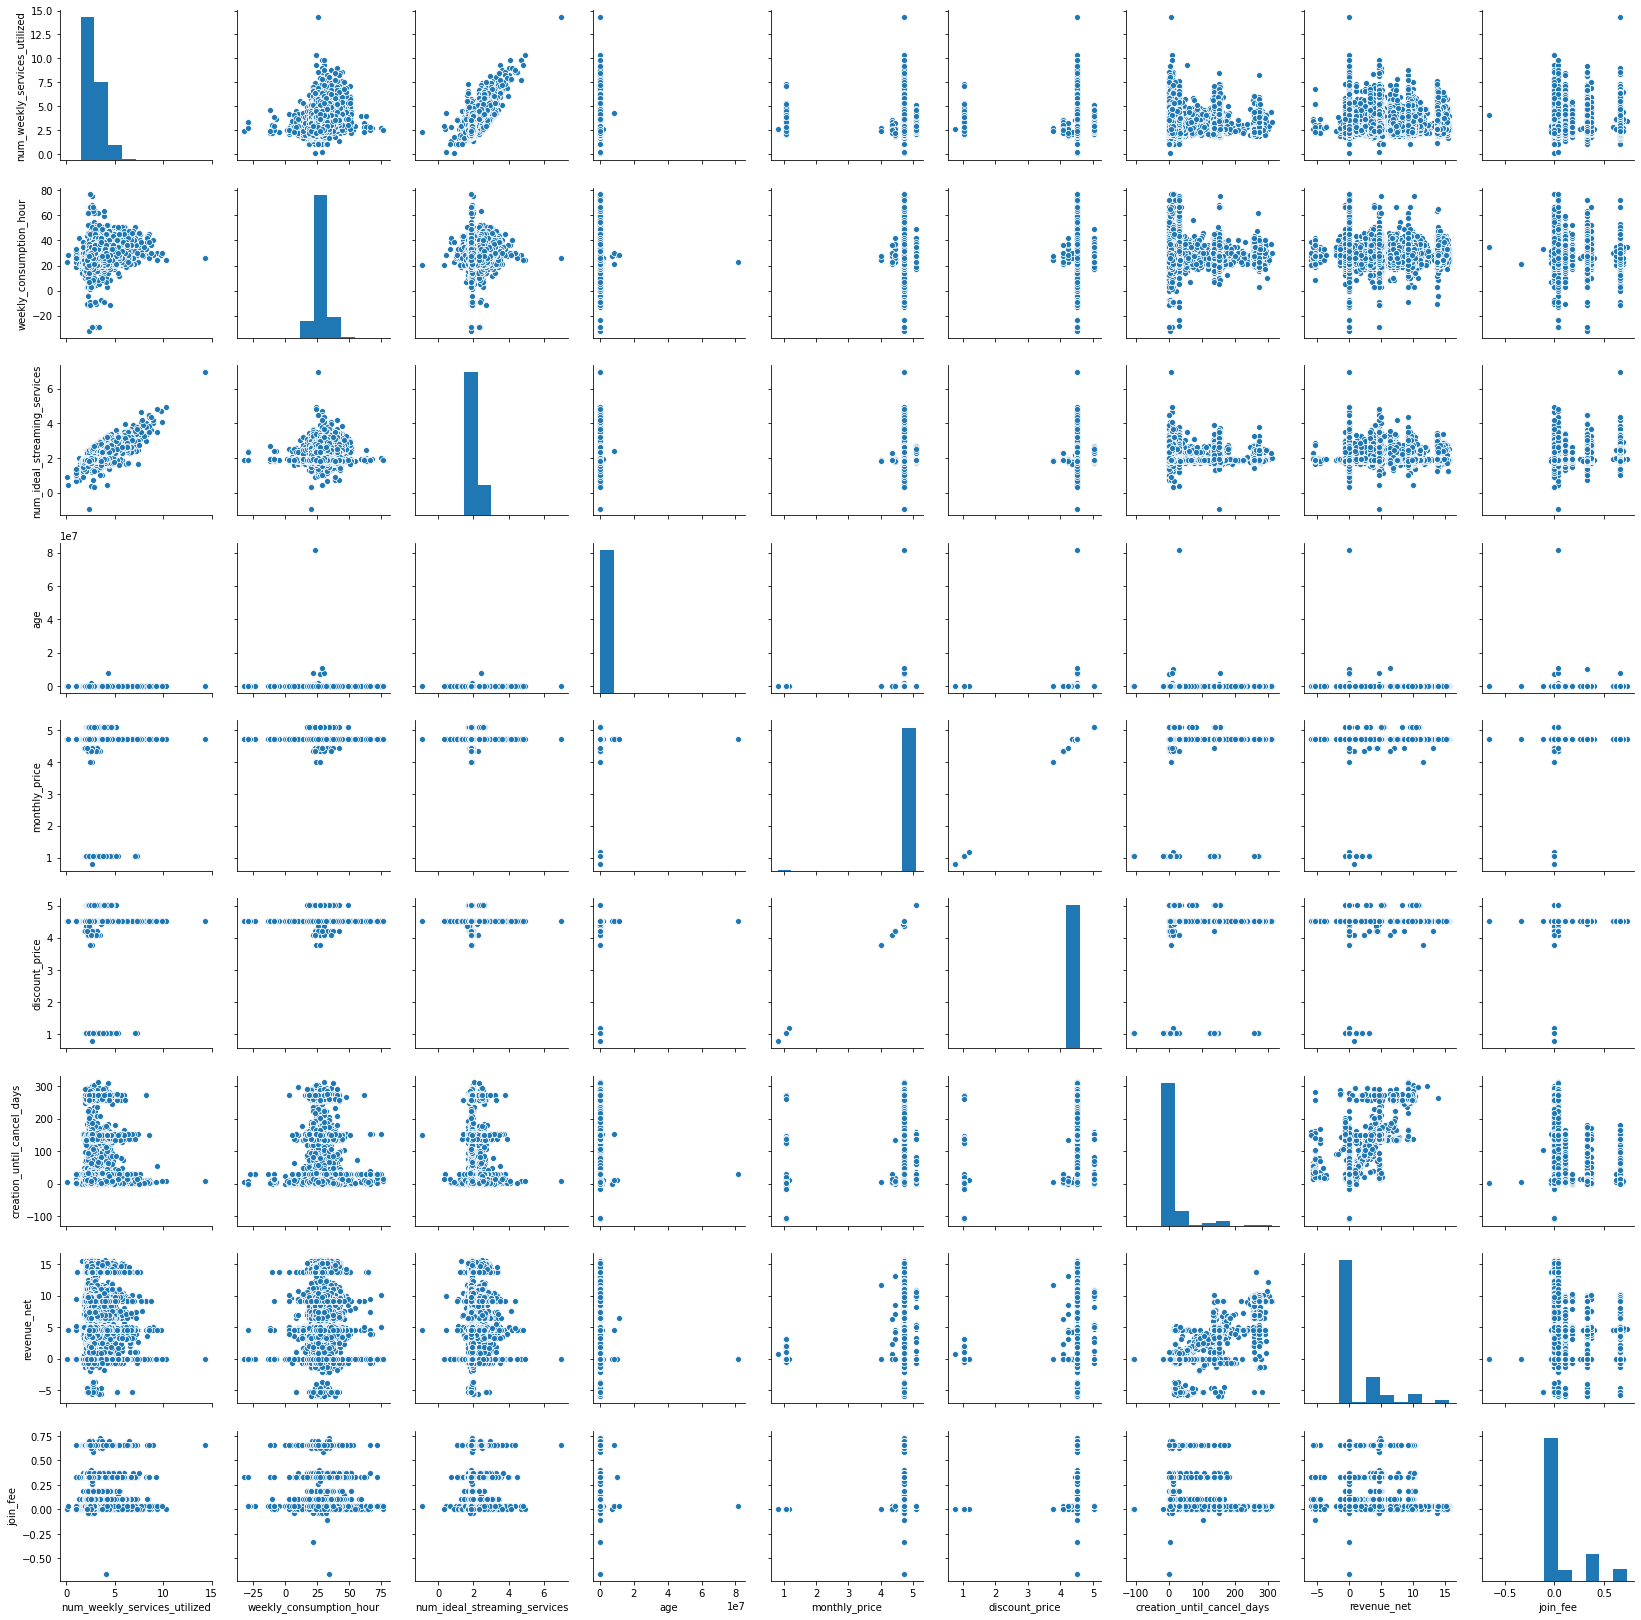

In [0]:
sns.pairplot(subscribers[attri_fl])

In [0]:
#========= describe the data of all object attri

pd.set_option('display.max_rows',None)
pd.DataFrame(subscribers[attri_ob].apply(pd.value_counts,axis=0).T.stack(),columns=['counts']).reset_index().\
        sort_values(by=['level_0','counts'],ascending=[True,False])


,level_0,level_1,counts
52,attribution_survey,facebook,119126.0
62,attribution_survey,tv,39904.0
56,attribution_survey,referral,20882.0
53,attribution_survey,search,8492.0
55,attribution_survey,pinterest,7856.0
51,attribution_survey,other,6496.0
63,attribution_survey,public_radio,6219.0
64,attribution_survey,social_organic,3869.0
59,attribution_survey,youtube,3108.0
58,attribution_survey,podcast,2995.0


In [153]:
#========= Check how many attri have nan value

#print(list(subscribers.isnull().any()[subscribers.isnull().any() == True].index))
attri_nan = list(subscribers.isnull().any()[subscribers.isnull().any() == True].index)
"""

['package_type', 'num_weekly_services_utilized', 'preferred_genre', 'intended_use', 
'weekly_consumption_hour', 'num_ideal_streaming_services', 'age', 'male_TF', 'attribution_survey', 
'op_sys', 'creation_until_cancel_days', 'revenue_net', 'join_fee', 'payment_type']

"""

#========= Check the portion of nan value for each attri
subscribers[attri_nan].isnull().apply(lambda x: sum(x) / len(x),axis=0).sort_values(ascending=False)

payment_type                    0.596845
num_ideal_streaming_services    0.489220
num_weekly_services_utilized    0.486966
creation_until_cancel_days      0.332173
weekly_consumption_hour         0.160985
join_fee                        0.156393
revenue_net                     0.156393
age                             0.156393
preferred_genre                 0.147991
package_type                    0.147633
dtype: float64

#### missing and weird value

In [13]:
s1 = subscribers.copy()
s1

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
227624,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
227626,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [14]:
#========= describe the data of all float attri
subscribers.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,creation_until_cancel_days,revenue_net,join_fee
count,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05,227628.0,227628.000000,227628.000000,151768.000000,192724.000000,192724.000000
mean,2.498624e+07,2.998568,27.997724,1.999848,7.579755e+02,4.0,4.732049,4.512188,16.570832,1.557353,0.115145
std,2.885543e+06,0.748752,4.976341,0.249508,1.920204e+05,0.0,0.101049,0.097078,35.777986,3.068829,0.176971
min,2.000001e+07,0.049049,-32.146760,-0.919933,0.000000e+00,4.0,0.807400,0.770700,-108.000000,-5.982100,-0.660600
25%,2.248998e+07,2.493926,24.401536,1.867354,3.500000e+01,4.0,4.734300,4.514100,2.000000,0.000000,0.036700
50%,2.497011e+07,2.760506,27.301448,1.908159,4.600000e+01,4.0,4.734300,4.514100,8.000000,0.000000,0.036700
75%,2.749020e+07,3.271574,30.201361,1.953559,5.700000e+01,4.0,4.734300,4.514100,13.000000,2.532300,0.110100
max,2.999998e+07,14.335378,76.599962,6.955714,8.172000e+07,4.0,5.101300,5.027900,312.000000,15.634200,0.734000


In [0]:
subscribers = s1.copy()

In [16]:
#====== flip 'cancel_before_trial_end'
subscribers['cancel_before_trial_end'] = subscribers['cancel_before_trial_end'] == False

#====== num_weekly_services_utilized (self reported)
subscribers.loc[subscribers['num_weekly_services_utilized'].isnull()] # <- missing value: 110450 (48%)

#====== weekly_consumption_hour (self reported): some negative and some missing
# subscribers.loc[subscribers['weekly_consumption_hour'] < 0] # <- error data: 29 rows drop
subscribers = subscribers.loc[(subscribers['weekly_consumption_hour'] >= 0) | subscribers['weekly_consumption_hour'].isnull()] # <- drop error data

# subscribers.loc[subscribers['weekly_consumption_hour'].isnull()] # <- missing value: 37930 rows (16%)

#====== num_ideal_streaming_services (self reported): # some negative and lots missing
# subscribers.loc[subscribers['num_ideal_streaming_services'] < 0] # <- error data: 1 row
subscribers = subscribers.loc[(subscribers['num_ideal_streaming_services'] >= 0) | (subscribers['num_ideal_streaming_services'].isnull())] # <- drop error data

# subscribers.loc[subscribers['num_ideal_streaming_services'].isnull()] # <- missing value: 112170 rows, 49% 

#====== age (self reported): # weird format, lots missing
# subscribers.loc[subscribers['age'].isnull()] # <- missing value: 35169 rows, 15%

#=== lots of weird formate in age, we can remedy this
index = subscribers.loc[(subscribers['age'] >1800) & (subscribers['age'] <= 2020)].index 
subscribers.loc[index,'age'] = (2020 - subscribers.loc[index,'age']).astype('int')

# subscribers.loc[subscribers['age'] > 200] # <- still weird data: 82 rows
subscribers = subscribers.loc[(subscribers['age'] < 200) | (subscribers['age'].isnull())]  # <- drop these rows
subscribers

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,False,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,True,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,True,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,True,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,True,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,True,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
227624,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,NaN,False,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,31.0,False,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
227626,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,NaN,False,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [18]:
#====== check the rest floating attri
#====== check monthly_price
subscribers['monthly_price'].value_counts()
'''
4.7343    226988
5.1013       325
1.0643       167
4.4407        18
4.3673        12
4.0003         2
1.1744         1
0.8074         1
4.6976         1
'''
#====== check discount_price
subscribers['discount_price'].value_counts()
'''
4.5141    226983
5.0279       325
1.0276       167
4.2205        18
4.0737        12
4.3673         4
4.4407         2
3.7801         2
1.1744         1
0.7707         1
'''

#====== check creation_until_cancel_days
subscribers.loc[subscribers['creation_until_cancel_days'] < 0] # <- weird data: 4 rows
subscribers = subscribers.loc[(subscribers['creation_until_cancel_days'] >= 0)| (subscribers['creation_until_cancel_days'].isnull())] # <- drop weird data
subscribers

#====== check revenue_net

subscribers.loc[subscribers['revenue_net'].isnull()] # <- missing value: 34904 rows

# subscribers.loc[subscribers['revenue_net'].isnull(),'join_fee'].value_counts() # <- null, means no revenue_net, no join_fee
# subscribers.loc[subscribers['join_fee'].isnull(),'revenue_net'].value_counts() # <- null

# subscribers.loc[subscribers['revenue_net'].isnull(),'paid_TF'].value_counts() # <- all True


subscribers


,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,False,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,True,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,True,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,True,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,True,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,True,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
227624,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,NaN,False,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,31.0,False,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
227626,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,NaN,False,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [19]:
'''
payment_type                    0.595612
num_ideal_streaming_services    0.492778
num_weekly_services_utilized    0.485222
creation_until_cancel_days      0.333263
weekly_consumption_hour         0.166632
preferred_genre                 0.159585
package_type                    0.156281
age                             0.154502
join_fee                        0.153338
revenue_net                     0.153338
op_sys                          0.058758
intended_use                    0.015591
attribution_survey              0.011615
male_TF                         0.001182
'''

#=========================
#====== check those category attri
#====== package_type
subscribers['package_type'].value_counts()
'''
base        111408
enhanced     63213
economy      17336
'''
#== check missing value
subscribers.loc[subscribers['package_type'].isnull()] # <- 35553 rows
# subscribers.loc[subscribers['package_type'].isnull(),'preferred_genre'].value_counts() # <- very few have values, most also missing preferred_genre
# subscribers.loc[subscribers['package_type'].isnull(),'intended_use'].value_counts() # <- seem to be very few 'replace OTT'

'''
expand regional access         13834
expand international access    12792
education                       5062
other                           1313
replace OTT                        1
'''
# subscribers.loc[:,'intended_use'].value_counts() 
# <- seem that all id with 'intended_use' in ['expand regional access','expand international access','education'] dont have package_type & preferred_genre
'''
access to exclusive content    88985
replace OTT                    69156
supplement OTT                 26592
expand regional access         14018
expand international access    12973
other                           7107
education                       5136
'''

#====== preferred_genre
# subscribers.loc[subscribers['preferred_genre'].isnull()] # <- 36304 rows 16% the same as package_type

#=========================


#====== intended_use self_report
# subscribers.loc[subscribers['intended_use'].isnull()] # <- missing data: 3543 drop
subscribers = subscribers.loc[subscribers['intended_use'].isnull() == False] # <- drop missing data

#====== male_TF

# subscribers.loc[subscribers['male_TF'].isnull()] # <- missing data: 235 drop
subscribers = subscribers.loc[subscribers['male_TF'].isnull() == False] # <- drop missing data

#====== country

# subscribers['country'].value_counts() # <- all 'UAE', drop this columns
# subscribers.drop(columns = ['country'],inplace = True)


#====== attribution_survey
# subscribers.loc[subscribers['attribution_survey'].isnull()] # <- missing value: 550 rows
subscribers = subscribers.loc[subscribers['attribution_survey'].isnull() == False] # <- drop

#====== op_sys
#====== as it is not self-reported, might be some system which could not be recognized
# subscribers.loc[subscribers['op_sys'].isnull()] # <- missing value: 12842 rows

subscribers.loc[subscribers['op_sys'].isnull(),'op_sys'] = 'Others' # <- fill these samples with 'op_sys' = 'Others

#====== plan_type
subscribers['plan_type'].value_counts()

'''
base_uae_14_day_trial    222835
high_uae_14_day_trial       322
high_sar_14_day_trial        10
base_eur_14_day_trial         9
low_gbp_14_day_trial          4
high_aud_14_day_trial         2
'''
subscribers.loc[subscribers['plan_type'].isnull()] # <- nothing

#====== language
# subscribers['language'].value_counts() # <- all 'ar', drop this column
# subscribers.drop(columns = ['language'],inplace = True)

#====== payment_type

subscribers['payment_type'].value_counts()

'''
Standard Charter    37897
Paypal              30258
RAKBANK             14495
CBD                  4962
Najim                2361
Apple Pay               4
'''

subscribers.loc[subscribers['payment_type'].isnull()] # <- missing value: 133205 rows

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,Others,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,True,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,True,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,True,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,True,2019-10-20,False,0.0,0.0367,ar,False,False,NaN
8,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,73.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-23 17:50:25,1.0,True,2020-03-09,False,0.0,0.6606,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227621,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,False,61.0,False,UAE,affiliate,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-06 02:57:03,0.0,True,2020-03-21,False,0.0,0.3303,ar,False,False,NaN
227622,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,UAE,email,pinterest,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-01 22:43:56,11.0,True,2020-01-16,False,0.0,0.0000,ar,False,False,NaN
227623,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,True,2019-12-02,False,0.0,0.3303,ar,False,False,NaN
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,31.0,False,2020-01-05,True,0.0,0.0367,ar,False,False,NaN


### engagement

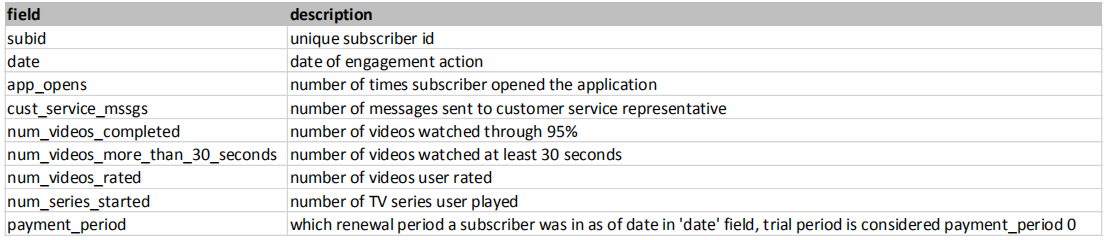

In [24]:
Image(filename = 'graph/engagement.jpg', width=800, height=200)

In [21]:
#========= Look at data

engagement

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [22]:
#========= describe the data of all float attri
engagement.describe()

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
count,2.585724e+06,2.551113e+06,2.551113e+06,2.551113e+06,2.551113e+06,2.551113e+06,2.551113e+06,2.585724e+06
mean,2.499102e+07,2.247702e+00,3.896170e-01,2.794718e+00,4.394189e+00,5.889939e-02,6.860515e-01,6.747735e-01
std,2.891154e+06,2.433315e+00,8.061742e-01,2.212746e+00,1.453039e+00,2.800921e-01,4.643331e-01,7.088157e-01
min,2.000006e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.248173e+07,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.498278e+07,1.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,2.750345e+07,3.000000e+00,1.000000e+00,4.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,2.999994e+07,1.380000e+02,3.900000e+01,2.400000e+01,3.200000e+01,1.200000e+01,9.000000e+00,3.000000e+00


In [0]:
#========= Check how many attri have nan value

attri_nan = list(engagement.isnull().any()[engagement.isnull().any() == True].index)

'''
['app_opens', 'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started']

'''
#========= Check the portion of nan value

engagement[attri_nan].isnull().apply(lambda x: sum(x) / len(x),axis=0).sort_values(ascending=False)

'''
num_series_started                 0.013385
num_videos_rated                   0.013385
num_videos_more_than_30_seconds    0.013385
num_videos_completed               0.013385
cust_service_mssgs                 0.013385
app_opens                          0.013385
'''

#========= Hypothesis: Might be some specific customers have no records on all columns

# engagement.loc[engagement['num_series_started'].isnull() == False].isnull().sum()

'''
subid                              0
date                               0
app_opens                          0
cust_service_mssgs                 0
num_videos_completed               0
num_videos_more_than_30_seconds    0
num_videos_rated                   0
num_series_started                 0
payment_period                     0
'''
#========= Hypothesis has been confirmed

engagement_id = engagement['subid'].unique()

#========= Create a new df without nan value

engagement_1 = engagement.loc[engagement['num_series_started'].isnull() == False]


In [0]:
engagement_1.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [26]:
#========= Calculate the deltatime of each id

duration =  engagement_1.groupby(by = 'subid').date.apply(lambda x: (max(x) - min(x)).days + 1)

engagement_agg = pd.DataFrame(duration)

engagement_agg.columns = ['duration']

#========= Calculate the activating duration of each id

engagement_agg['activating_day'] = engagement_1.groupby(by = 'subid').date.agg(len)

#========= Calculate the max of pay_period of each id

engagement_agg['max_period'] = engagement_1.groupby(by = 'subid').payment_period.agg(max)

#========= Aggregate other feature and take sum
data = engagement_1[['subid','app_opens','cust_service_mssgs','num_videos_completed','num_videos_more_than_30_seconds',\
              'num_videos_rated','num_series_started',]].groupby(by = 'subid').agg(sum)
              
engagement_agg = pd.merge(left=engagement_agg,right=data,left_index=True,right_index=True)

engagement_agg

,duration,activating_day,max_period,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
subid,,,,,,,,,
20000062,5,4,0.0,4.0,3.0,6.0,23.0,0.0,1.0
20000405,11,4,0.0,5.0,4.0,13.0,17.0,0.0,1.0
20000604,26,15,1.0,14.0,5.0,8.0,68.0,0.0,1.0
20000685,44,38,1.0,46.0,10.0,14.0,165.0,0.0,8.0
20000741,2,2,0.0,1.0,1.0,2.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
29999740,15,14,0.0,15.0,3.0,11.0,31.0,0.0,0.0
29999820,10,10,0.0,12.0,6.0,22.0,50.0,0.0,7.0
29999822,12,5,0.0,5.0,4.0,2.0,25.0,0.0,1.0


In [27]:
#========= Calculate some ratio (sum of aggragation data devided by activating_day)

engagement_agg_1 = engagement_agg[['app_opens',
       'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started']].apply(lambda x: x / engagement_agg['activating_day'],axis = 0)

engagement_agg_1 = pd.merge(left=engagement_agg[['duration','activating_day']],right=engagement_agg_1,left_index=True,right_index=True)


engagement_agg_1

,duration,activating_day,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
subid,,,,,,,,
20000062,5,4,1.000000,0.750000,1.500000,5.750000,0.000000,0.250000
20000405,11,4,1.250000,1.000000,3.250000,4.250000,0.000000,0.250000
20000604,26,15,0.933333,0.333333,0.533333,4.533333,0.000000,0.066667
20000685,44,38,1.210526,0.263158,0.368421,4.342105,0.000000,0.210526
20000741,2,2,0.500000,0.500000,1.000000,3.500000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
29999740,15,14,1.071429,0.214286,0.785714,2.214286,0.000000,0.000000
29999820,10,10,1.200000,0.600000,2.200000,5.000000,0.000000,0.700000
29999822,12,5,1.000000,0.800000,0.400000,5.000000,0.000000,0.200000


### customer_service_reps

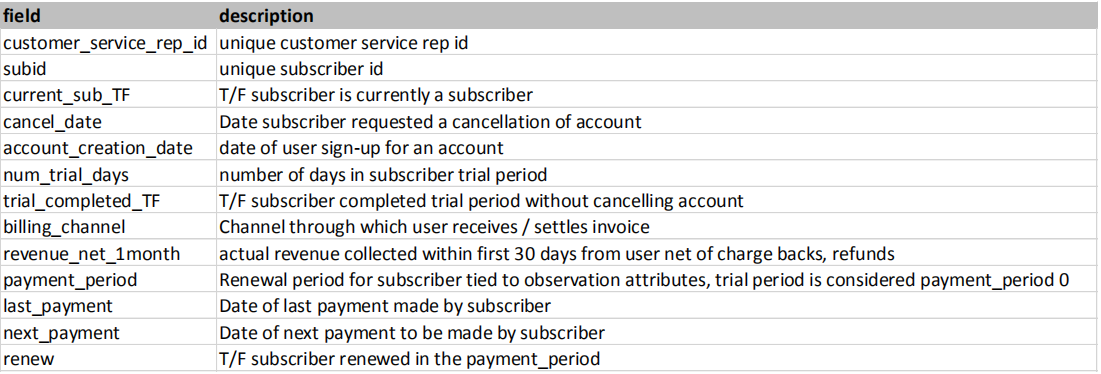

In [0]:
Image(filename = 'graph/customer service reps.jpg', width=800, height=250)

In [0]:
#========= Look at data
customer_service_reps.head(10)

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
9,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,1,2020-04-02 01:20:25,NaT,NaN
10,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,0,2020-03-27 23:46:37,2020-03-28 06:47:31,NaN
11,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,1,2020-03-28 06:47:31,NaT,NaN
12,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,0,2020-03-27 23:09:18,2020-03-28 05:09:22,NaN
13,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,1,2020-03-28 05:09:22,NaT,NaN


In [28]:
#========= Check how many attri have nan value

attri_nan = list(customer_service_reps.isnull().any()[customer_service_reps.isnull().any() == True].index)

'''
['cancel_date', 'next_payment', 'renew']
'''

"\n['cancel_date', 'next_payment', 'renew']\n"

In [0]:
#========= Check the id and check the difference between ids
customer_service_reps_id = customer_service_reps['subid'].unique()

#========= compare engagement and subsceibers
subscribers_id = subscribers['subid']
engagement_id = engagement['subid'].unique()


# len(set(engagement_id)) # 92609

# len(set(subscribers_id)) # 227628

# len(set(customer_service_reps_id)) # 1369360

# len(set(engagement_id).difference(set(subscribers_id))) # 0 means engagement_id all belongs to subscribers_id

# len(set(subscribers_id).difference(set(customer_service_reps_id))) # 92578 means not all subscribers_id could be found in customer_service_reps_id

# len(set(engagement_id).difference(set(customer_service_reps_id))) # 0 means engagement_id all belongs to customer_service_reps_id

In [30]:
see = customer_service_reps.groupby(by='subid').num_trial_days.agg('first')
see.value_counts()

14    1281127
7       64043
0       24190
Name: num_trial_days, dtype: int64

In [31]:
#========= Check the meaning of the attributes 'trial_completed_TF'
customer_service_reps.loc[customer_service_reps['trial_completed_TF'] == False]

# len(customer_service_reps.loc[customer_service_reps['trial_completed_TF'] == False]['subid'].unique())  # 660927

#========= Merge csr and subscribers tables to check the features

customer_service_reps_1 = customer_service_reps.loc[customer_service_reps['subid'].isin(subscribers_id)]
customer_service_reps_1.drop_duplicates(subset=['subid'],keep='first',inplace = True)
customer_service_reps_1 = pd.merge(customer_service_reps_1,subscribers,on='subid')

customer_service_reps_1[[ 'subid', 'current_sub_TF', 'cancel_date',
       'account_creation_date_x', 'num_trial_days', 'trial_completed_TF',
       'revenue_net_1month','last_payment', 'next_payment', 'renew',
       'retarget_TF',  'plan_type', 'account_creation_date_y',
       'creation_until_cancel_days', 'cancel_before_trial_end',
       'trial_end_date', 'initial_credit_card_declined', 
       'revenue_net','paid_TF', 'refund_after_trial_TF',
       'payment_type']]


#====== check relationship between 'trial_completed_TF' and 'cancel_before_trial_end'
# sum(customer_service_reps_1['trial_completed_TF'] == customer_service_reps_1['cancel_before_trial_end'])  # 0
# means 'trial_completed_TF' equals to 'cancel_before_trial_end'

#====== further check
# len(customer_service_reps.loc[customer_service_reps['payment_period'] == 1]) # 581391
# len(customer_service_reps.loc[(customer_service_reps['payment_period'] == 1) & (customer_service_reps['trial_completed_TF'] == True)]) # 581391
#= 'trial_completed_TF' could be seen as the signal of convert


customer_service_reps_1

#========= check the conversion rate in merged table
# sum(customer_service_reps_1['cancel_before_trial_end']) / len(customer_service_reps_1) # 0.5380068443430468

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date_x,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date_y,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
0,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False,base,NaN,drama,access to exclusive content,30.201361,NaN,False,56.0,False,UAE,affiliate,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-27 23:59:06,12.0,True,2020-04-11,False,0.0000,0.3303,ar,False,False,NaN
1,34138852,20407871,False,2020-04-01 05:42:28,2020-03-27 23:58:49,14,False,OTT,0.0000,0,2020-03-27 23:58:49,NaT,False,base,2.670664,comedy,supplement OTT,28.751405,1.939364,False,33.0,False,UAE,referral,referral,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-27 23:58:49,5.0,True,2020-04-11,False,0.0000,0.0000,ar,False,False,NaN
2,33808892,27818002,False,2020-04-08 22:00:59,2020-03-27 23:53:40,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False,enhanced,4.423316,drama,access to exclusive content,30.201361,2.322935,False,34.0,False,UAE,organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-27 23:53:40,12.0,True,2020-04-11,False,0.0000,0.3303,ar,False,False,NaN
3,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,0,2020-03-28 07:10:03,2020-04-11 14:22:46,True,base,3.080107,drama,replace OTT,34.551230,1.859332,False,63.0,False,UAE,organic,other,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-27 23:52:29,NaN,False,2020-04-11,False,4.5875,0.0367,ar,True,False,Standard Charter
4,31714601,20162910,True,NaT,2020-03-27 23:51:37,14,True,OTT,4.5875,0,2020-03-28 07:10:03,2020-04-11 14:22:46,True,economy,2.632371,comedy,replace OTT,30.201361,1.955068,False,38.0,False,UAE,brand sem intent google,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-27 23:51:37,NaN,False,2020-04-11,False,4.5875,0.3303,ar,True,False,Standard Charter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132659,36080216,27196054,True,NaT,2019-06-30 00:01:56,14,True,OTT,4.5875,0,2019-06-30 00:01:56,2019-07-14 14:34:33,True,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 00:01:56,NaN,False,2019-07-15,False,NaN,NaN,ar,True,False,Standard Charter
132660,34410719,29969407,False,2019-07-07 14:15:50,2019-06-30 00:01:31,14,False,OTT,0.0000,0,2019-06-30 01:05:36,NaT,False,NaN,4.820977,NaN,expand international access,28.751405,2.694708,False,44.0,False,UAE,search,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 00:01:31,7.0,True,2019-07-15,False,0.0000,0.0367,ar,False,False,NaN
132661,38865556,27585257,False,NaT,2019-06-30 00:01:25,14,True,OTT,4.9178,0,2019-06-30 00:01:25,2019-07-14 14:33:09,True,NaN,2.591132,NaN,other,27.301448,1.936826,False,53.0,False,UAE,google_organic,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 00:01:25,NaN,False,2019-07-15,False,4.9178,0.0000,ar,True,False,Najim
132662,30947283,26986758,False,2019-07-12 23:23:24,2019-06-30 00:00:51,14,False,OTT,0.0000,0,2019-06-30 01:05:29,NaT,False,NaN,4.193557,NaN,expand international access,30.201361,2.384519,False,49.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 00:00:51,12.0,True,2019-07-15,False,0.0000,0.0367,ar,False,False,NaN


In [32]:
#========= Check logitics behind data

#==== First type: doesn't trial and diretly buy and suddenly quit, drop them
drop_id = customer_service_reps.loc[(customer_service_reps['payment_period']==1) & (customer_service_reps['trial_completed_TF'] == False),'subid'] # <- weird data: 13 rows
customer_service_reps = customer_service_reps.loc[customer_service_reps['subid'].isin(drop_id) == False] # <- drop
customer_service_reps

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [33]:
#==== Check those  doesn't trial and diretly buy
# customer_service_reps.loc[(customer_service_reps['num_trial_days']==0) & (customer_service_reps['trial_completed_TF']==False)] # <- 1442 rows
customer_service_reps.loc[(customer_service_reps['num_trial_days']==0)] # <- 79958 rows

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
10,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,0,2020-03-27 23:46:37,2020-03-28 06:47:31,NaN
11,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,1,2020-03-28 06:47:31,NaT,NaN
12,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,0,2020-03-27 23:09:18,2020-03-28 05:09:22,NaN
13,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,1,2020-03-28 05:09:22,NaT,NaN
14,38637729,24230000,True,NaT,2020-03-27 22:59:09,0,True,google,1.1377,0,2020-03-27 22:59:09,2020-03-28 04:59:17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [34]:
#========= Check the distribution of different kind of trial on a time series

#==== step one, suppose the signal of conversion is decided by 'trial_completed_TF' in the first payment_period

customer_service_reps_2 = customer_service_reps.drop_duplicates(subset = ['subid'], keep = 'first')
customer_service_reps_2.set_index(keys = 'last_payment',inplace = True)
outcome = customer_service_reps_2.groupby(by = [pd.Grouper(freq='1W'),'num_trial_days']).agg({'payment_period':len,'trial_completed_TF':sum})
outcome

payment_period  trial_completed_TF
last_payment num_trial_days                                    
2019-06-30   0                          182               182.0
             7                          944               944.0
             14                       18877              9488.0
2019-07-07   0                          772               772.0
             7                         5490              5490.0
...                                     ...                 ...
2020-03-22   7                          133               133.0
             14                       27751             14991.0
2020-03-29   0                          388               374.0
             7                           96                96.0
             14                       16062              8959.0

[120 rows x 2 columns]

## Question 1: AB Testing

In [0]:
#========= Compare trial 7 days and trial 14 days, suppose the signal of conversion is payment_period = 1
#==== step one, drop num_trial_days == 0
customer = customer_service_reps.loc[(customer_service_reps['num_trial_days'] == 7) | (customer_service_reps['num_trial_days'] == 14)]

#==== step two, calculate number of data of trial 7 days and 14 days
customer_1 = customer.drop_duplicates(subset=['subid'],keep='first') 
n_7 = len(customer_1.loc[customer_1['num_trial_days'] == 7]) # 64043 for 7 days
n_14 = len(customer_1.loc[customer_1['num_trial_days'] == 14]) # 1281127 for 14 days

#==== step three, calculate conversion rate trial 7 days and 14 days
#== number of converted
len(customer.loc[(customer['payment_period'] == 1) & (customer['num_trial_days'] == 7)]) # 35314 for 7days
len(customer.loc[(customer['payment_period'] == 1) & (customer['num_trial_days'] == 14)]) # 523596 for 14 days

#== conversion rate
p_7 = 35314 / 64043 # 0.5514107708883094 for 7 days
p_14 = 523596 / 1281127 # 0.4086995278375992 for 14 days



In [0]:
customer.loc[customer['payment_period'] == 0].groupby(by='num_trial_days')['trial_completed_TF'].agg(len)

num_trial_days
7       64043
14    1281127
Name: trial_completed_TF, dtype: int64

In [0]:
#========= Validate Hypothesis
#==== Null Hypothesis: p_7 hat = p_14 hat, the length of trial doesn't matter
#==== Alternative Hypothesis: the length of trial does matter
z = (p_7 - p_14) / math.sqrt((p_7 * (1 - p_7) / n_7 + p_14 * (1 - p_14) / n_14)) # 70.90511117706859

#=== adopt 95% two tail test, with z = 1.96

70.9 > 1.96 # thus reject Null Hypothesis

True

## Question 3: Advertising

In [87]:
#========= Look at data
advertising_spend

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000


In [168]:
#========= Check the category of channel

attribution = subscribers[['account_creation_date','attribution_technical','attribution_survey']]
# attribution.set_index(keys = 'subid',drop = True, inplace = True)
pd.DataFrame(attribution[['attribution_technical','attribution_survey']].apply(pd.value_counts,axis=0).T.stack(),columns=['counts']).reset_index().\
        sort_values(by=['level_0','counts'],ascending=[True,False])

,level_0,level_1,counts
36,attribution_survey,facebook,118348.0
47,attribution_survey,tv,39497.0
43,attribution_survey,referral,20701.0
44,attribution_survey,search,8408.0
40,attribution_survey,pinterest,7783.0
38,attribution_survey,other,6435.0
42,attribution_survey,public_radio,6164.0
46,attribution_survey,social_organic,3837.0
48,attribution_survey,youtube,3064.0
41,attribution_survey,podcast,2971.0


No handles with labels found to put in legend.


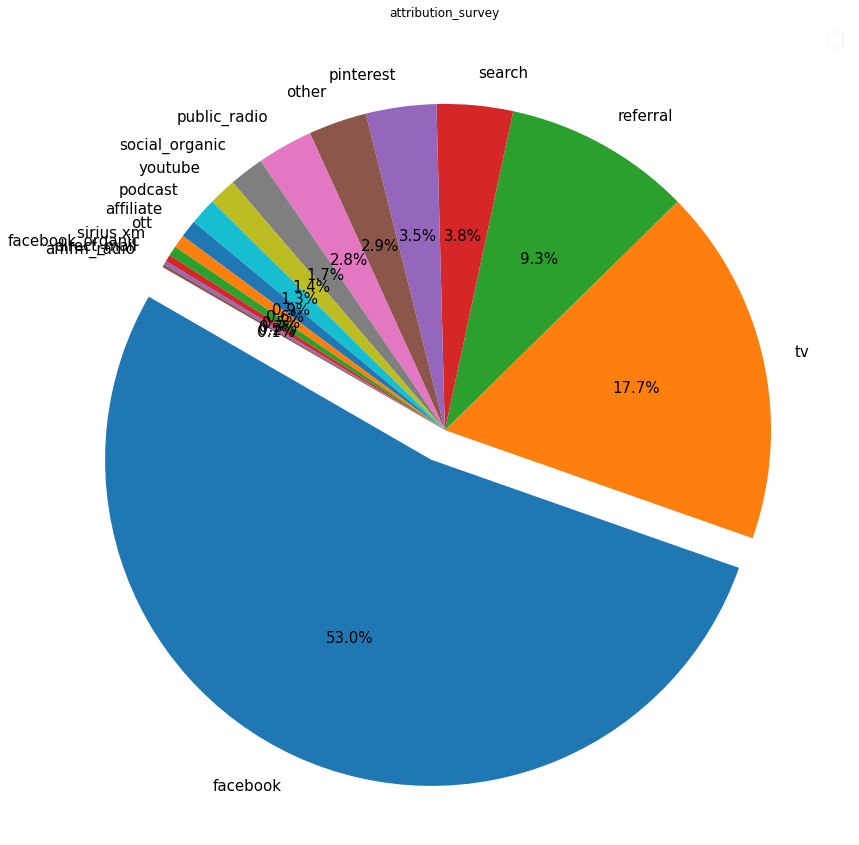

In [89]:
data = attribution['attribution_survey'].value_counts()
data
labels = data.index
# sizes = data
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
# plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.style.use("seaborn-notebook")
fig, ax = plt.subplots(figsize=(15, 15))
ax.legend(fontsize=20)
# ax.set_xlabel(fontsize=20)
plt.rcParams.update({'font.size': 15})
ax.pie(data,labels=labels,explode=explode,autopct='%1.1f%%',shadow=False,startangle=150,textprops= {'fontsize':15})
plt.title("attribution_survey")
plt.show()  

No handles with labels found to put in legend.


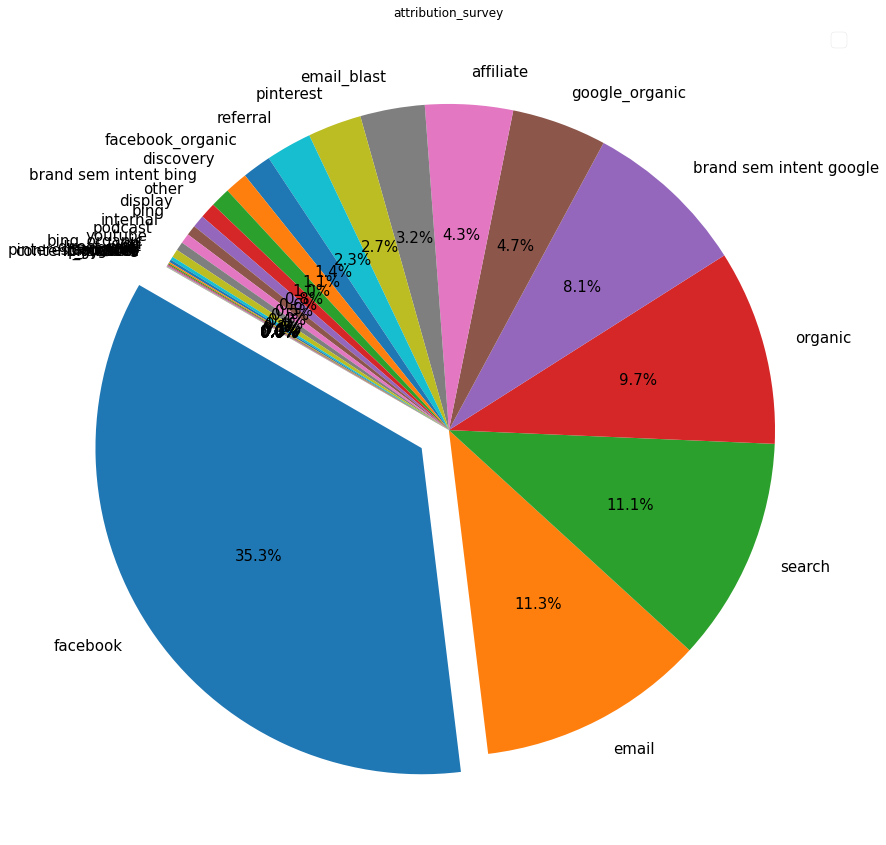

In [90]:
data = attribution['attribution_technical'].value_counts()
len(data)
labels = data.index
# sizes = data
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
len(explode)
# plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.style.use("seaborn-notebook")
fig, ax = plt.subplots(figsize=(15, 15))
ax.legend(fontsize=20)
# ax.set_xlabel(fontsize=20)
plt.rcParams.update({'font.size': 15})
ax.pie(data,labels=labels,explode=explode,autopct='%1.1f%%',shadow=False,startangle=150,textprops= {'fontsize':15})
plt.title("attribution_survey")
plt.show()  

In [135]:
#========= Look at attribution data
attribution

,account_creation_date,attribution_technical,attribution_survey,attribution_technical_new
subid,,,,
21724479,2020-01-24 21:44:16,facebook,facebook,facebook
23383224,2020-03-01 15:44:35,facebook,facebook,facebook
26844789,2019-12-07 16:37:06,organic,facebook,facebook
29417030,2020-01-27 16:09:32,search,tv,tv
26723159,2019-10-05 12:57:07,discovery,youtube,youtube
...,...,...,...,...
21434712,2019-11-17 14:12:33,facebook,facebook_organic,facebook_organic
25843074,2019-12-06 18:02:13,google_organic,referral,referral
24799085,2019-12-21 19:40:44,facebook,facebook,facebook


In [142]:
attribution

,account_creation_date,attribution_technical,attribution_survey
subid,,,
21724479,2020-01-24 21:44:16,facebook,facebook
23383224,2020-03-01 15:44:35,facebook,facebook
26844789,2019-12-07 16:37:06,organic,facebook
29417030,2020-01-27 16:09:32,search,tv
26723159,2019-10-05 12:57:07,discovery,youtube
...,...,...,...
21434712,2019-11-17 14:12:33,facebook,facebook_organic
25843074,2019-12-06 18:02:13,google_organic,referral
24799085,2019-12-21 19:40:44,facebook,facebook


In [169]:
organic_list = ['organic','google_organic','facebook_organic','bing_organic','pinterest_organic']

attribution['attribution_technical_new'] = attribution['attribution_technical']
attribution.loc[attribution['attribution_technical_new'].isin(organic_list),'attribution_technical_new'].index

Int64Index([26844789, 21191741, 26308559, 21829221, 21511732, 23676530,
            29773460, 28428067, 25100145, 22243338,
            ...
            29015408, 25419261, 23189569, 29324294, 23516585, 23208350,
            21934088, 28985855, 25843074, 20166335],
           dtype='int64', name='subid', length=34656)

In [170]:
#========= Conduct allocation
#==== Suppose the account_creation_date could be seen as a signal
#==== Step one: If organic in technical, then the same as survey
organic_list = ['organic','google_organic','facebook_organic','bing_organic','pinterest_organic']

attribution['attribution_technical_new'] = attribution['attribution_technical']
index = attribution.loc[attribution['attribution_technical_new'].isin(organic_list),'attribution_technical_new'].index
attribution.loc[index,'attribution_technical_new'] = attribution.loc[index,'attribution_survey']

#==== Step two: Fill the nan data in survey and technical
# index = attribution['attribution_technical_new'].isnull().index
index = attribution.loc[attribution['attribution_technical_new'].isnull()].index
attribution.loc[index,'attribution_technical_new'] = attribution.loc[index,'attribution_survey']

# index = attribution['attribution_survey'].isnull().index
index = attribution.loc[attribution['attribution_survey'].isnull()].index
attribution.loc[index,'attribution_survey'] = attribution.loc[index,'attribution_technical_new']

attribution.fillna(value='other',inplace = True)

attribution

,account_creation_date,attribution_technical,attribution_survey,attribution_technical_new
subid,,,,
21724479,2020-01-24 21:44:16,facebook,facebook,facebook
23383224,2020-03-01 15:44:35,facebook,facebook,facebook
26844789,2019-12-07 16:37:06,organic,facebook,facebook
29417030,2020-01-27 16:09:32,search,tv,search
26723159,2019-10-05 12:57:07,discovery,youtube,discovery
...,...,...,...,...
21434712,2019-11-17 14:12:33,facebook,facebook_organic,facebook
25843074,2019-12-06 18:02:13,google_organic,referral,referral
24799085,2019-12-21 19:40:44,facebook,facebook,facebook


In [0]:
#========= Continue allocation
#==== Calculate the monthly advertising outcome
survey_attribution = attribution.resample('M',on = 'account_creation_date')['attribution_survey'].apply(pd.value_counts).unstack()
technical_attribution = attribution.resample('M',on = 'account_creation_date')['attribution_technical_new'].apply(pd.value_counts).unstack()

#==== fill the lost three channel in survey_attribution
lost_df = pd.DataFrame(data=0,columns=['email_blast', 'email', 'brand sem intent google'],index=survey_attribution.index)
survey_attribution = pd.merge(left=survey_attribution, right=lost_df, left_index=True, right_index=True)

#==== quote the columns needed
advertising_spend.set_index(keys='date', drop=True, inplace = True)

survey_attribution = survey_attribution[advertising_spend.columns]
technical_attribution = technical_attribution[advertising_spend.columns]



total_attribution = survey_attribution * 0.5 + technical_attribution * 0.5

total_attribution

In [176]:
CAC_df = advertising_spend / total_attribution
CAC_df

,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
date,,,,,,,,
2019-06-30,55.515548,493.421053,209.696970,222.916667,247.916667,200.000000,114.563107,73.053892
2019-07-31,4.635710,46.883721,18.502674,20.659554,23.928215,40.134680,6.352567,4.958678
2019-08-31,3.978094,49.689847,13.163636,22.866345,15.680616,69.957537,7.515152,4.886813
2019-09-30,5.038560,63.192997,14.189189,28.381079,26.688365,93.825589,9.022556,5.059829
2019-10-31,4.276247,66.608238,13.051585,26.918239,25.985091,67.082035,8.422376,4.712718
2019-11-30,3.592239,59.296875,12.610489,21.481850,31.750339,31.460674,8.659794,4.355609
2019-12-31,4.314433,57.651515,13.272690,18.347107,32.570659,17.156863,7.578947,4.617605
2020-01-31,5.576737,65.766551,12.739336,17.461538,22.016936,17.142857,7.262873,4.147982
2020-02-29,4.869684,49.772580,10.923607,18.943693,16.891892,9.677419,8.116677,3.354839


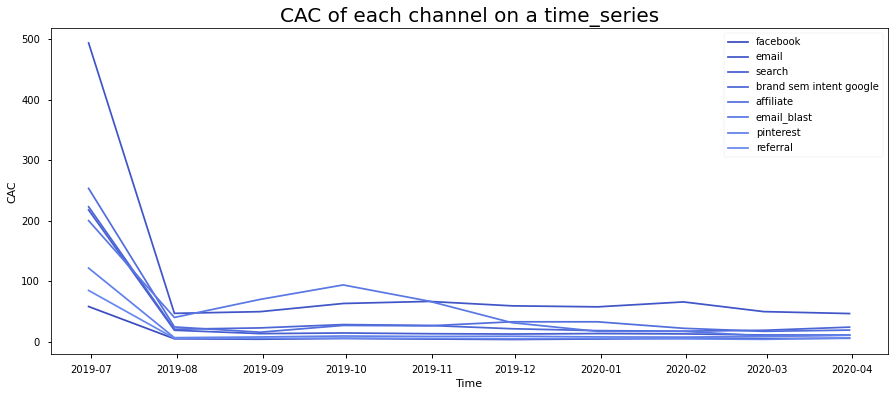

In [165]:
from matplotlib import rcParams, cycler

plt.style.use("seaborn-notebook")

data = CAC_df
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1,)))

fig, ax = plt.subplots(figsize=(15, 6))
lines = ax.plot(CAC_df)

plt.ylabel('CAC')
plt.xlabel('Time')
plt.title('CAC of each channel on a time_series',fontdict={'size':20})
ax.legend(lines,CAC_df.columns)

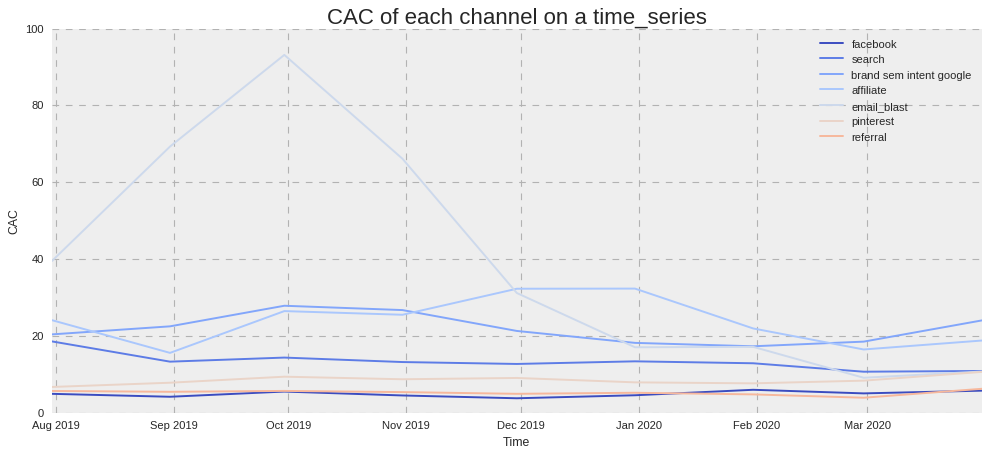

In [0]:
from matplotlib import rcParams, cycler

plt.style.use("seaborn-notebook")

data_ = CAC_df[['facebook', 'search', 'brand sem intent google', 'affiliate',
       'email_blast', 'pinterest', 'referral']]
data_ = data_.iloc[1:]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))

fig, ax = plt.subplots(figsize=(15, 6))
lines = ax.plot(data_)

plt.ylabel('CAC')
plt.xlabel('Time')
plt.title('CAC of each channel on a time_series',fontdict={'size':20})
ax.legend(lines,data_.columns)

In [0]:
CAC_df.columns

Index(['facebook', 'email', 'search', 'brand sem intent google', 'affiliate',
       'email_blast', 'pinterest', 'referral'],
      dtype='object')

## Churn model

In [162]:
customer_service_reps

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [163]:
subscribers

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,False,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,Others,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,True,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,True,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,True,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,True,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,True,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
227624,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,NaN,False,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,31.0,False,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
227626,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,NaN,False,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [104]:
engagement_1

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [116]:
engagement_agg_1

,duration,activating_day,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
subid,,,,,,,,
20000062,5,4,1.000000,0.750000,1.500000,5.750000,0.000000,0.250000
20000405,11,4,1.250000,1.000000,3.250000,4.250000,0.000000,0.250000
20000604,26,15,0.933333,0.333333,0.533333,4.533333,0.000000,0.066667
20000685,44,38,1.210526,0.263158,0.368421,4.342105,0.000000,0.210526
20000741,2,2,0.500000,0.500000,1.000000,3.500000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
29999740,15,14,1.071429,0.214286,0.785714,2.214286,0.000000,0.000000
29999820,10,10,1.200000,0.600000,2.200000,5.000000,0.000000,0.700000
29999822,12,5,1.000000,0.800000,0.400000,5.000000,0.000000,0.200000


#### preparation

In [97]:
subscribers.set_index( keys='subid',drop = True, inplace = True)
df = pd.merge(left = subscribers, right = engagement_agg_1, left_index = True, right_index = True,how = 'inner')
df

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,duration,activating_day,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
subid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,True,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN,2,2,1.000000,1.000000,6.500000,6.500000,0.000000,0.500000
29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,NaN,False,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter,46,41,0.975610,0.414634,4.439024,4.439024,0.146341,0.951220
20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-05 14:52:22,NaN,False,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK,46,46,2.260870,0.217391,1.826087,4.478261,0.000000,0.630435
24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,73.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-23 17:50:25,1.0,True,2020-03-09,False,0.0000,0.6606,ar,False,False,NaN,2,2,1.500000,1.500000,1.000000,6.500000,0.000000,0.000000
21361112,enhanced,NaN,comedy,access to exclusive content,37.451142,NaN,False,24.0,True,UAE,search,search,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-01 07:29:14,6.0,True,2019-12-16,False,0.0000,0.3303,ar,False,False,NaN,7,2,2.000000,1.500000,1.000000,6.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21928274,base,NaN,drama,replace OTT,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-14 02:04:52,NaN,False,2020-01-29,False,NaN,NaN,ar,True,False,RAKBANK,28,28,1.785714,0.571429,3.285714,6.285714,0.107143,0.785714
25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,False,61.0,False,UAE,affiliate,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-06 02:57:03,0.0,True,2020-03-21,False,0.0000,0.3303,ar,False,False,NaN,1,1,1.000000,2.000000,0.000000,6.000000,0.000000,0.000000
25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,UAE,email,pinterest,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-01 22:43:56,11.0,True,2020-01-16,False,0.0000,0.0000,ar,False,False,NaN,12,12,2.583333,0.416667,3.916667,4.916667,0.000000,0.666667


In [98]:
# ====== extract label info from cutomer_service_rep
#==== the sacle is those who have successfully gone through to period 1
customer_with_period_one = customer_service_reps.loc[customer_service_reps['payment_period'] == 1,'subid']
customer_service_reps_1 = customer_service_reps.loc[customer_service_reps['subid'].isin(customer_with_period_one)]
customer_service_reps_2 = customer_service_reps_1.loc[customer_service_reps_1['next_payment'].isnull()]
customer_service_reps_2 = customer_service_reps_2[['subid','current_sub_TF','num_trial_days',
                            'billing_channel','revenue_net_1month','payment_period']]
customer_service_reps_2.set_index(keys='subid',drop = True, inplace = True)
customer_service_reps_2

,current_sub_TF,num_trial_days,billing_channel,revenue_net_1month,payment_period
subid,,,,,
25108574,False,7,itunes,1.1377,3
25914865,True,14,itunes,1.1377,1
28778936,True,0,google,1.1377,1
21481314,True,0,google,1.1377,1
24230000,True,0,google,1.1377,1
...,...,...,...,...,...
24792193,True,14,OTT,4.7343,3
22320767,False,14,OTT,4.5875,1
21781165,True,14,OTT,3.8902,1


In [99]:
#========= Merge two df
df = pd.merge(left = df, right = customer_service_reps_2, left_index = True, right_index = True, how = 'inner')

#========= Check how many attri have nan value

#print(list(subscribers.isnull().any()[subscribers.isnull().any() == True].index))
attri_nan = list(df.isnull().any()[df.isnull().any() == True].index)
attri_nan
"""

['package_type', 'num_weekly_services_utilized', 'preferred_genre', 'intended_use',
 'weekly_consumption_hour', 'num_ideal_streaming_services', 'age', 'attribution_survey', 'op_sys',
 'creation_until_cancel_days', 'revenue_net', 'join_fee']

"""

#========= Check the portion of nan value for each attri
df[attri_nan].isnull().apply(lambda x: sum(x) / len(x),axis=0).sort_values(ascending=False)

creation_until_cancel_days      0.852814
num_ideal_streaming_services    0.480999
num_weekly_services_utilized    0.478621
weekly_consumption_hour         0.404655
join_fee                        0.402846
revenue_net                     0.402846
age                             0.402846
preferred_genre                 0.184355
package_type                    0.184178
dtype: float64

In [101]:
df

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,duration,activating_day,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,current_sub_TF,num_trial_days,billing_channel,revenue_net_1month,payment_period
subid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,NaN,False,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter,46,41,0.975610,0.414634,4.439024,4.439024,0.146341,0.951220,True,14,OTT,4.5875,1
20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-05 14:52:22,NaN,False,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK,46,46,2.260870,0.217391,1.826087,4.478261,0.000000,0.630435,True,14,OTT,3.4498,1
26874196,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-09 03:09:57,NaN,False,2020-03-24,False,NaN,NaN,ar,True,False,Paypal,1,1,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,True,14,OTT,4.5875,1
21511732,enhanced,2.320133,comedy,replace OTT,27.301448,1.849591,True,26.0,False,UAE,organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-11 03:19:28,153.0,False,2019-11-26,False,3.2296,0.0367,ar,True,False,RAKBANK,46,20,2.350000,0.250000,0.900000,3.450000,0.000000,0.550000,False,14,OTT,3.2296,1
29576692,NaN,3.012358,NaN,expand international access,34.551230,1.927293,False,31.0,False,UAE,brand sem intent google,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-07-13 05:19:43,56.0,False,2019-07-28,False,1.6148,0.0367,ar,True,True,Standard Charter,46,46,1.826087,0.478261,4.413043,4.413043,0.043478,1.000000,False,14,OTT,4.5875,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29190645,enhanced,2.764924,comedy,access to exclusive content,25.851492,1.981060,False,46.0,False,UAE,search,social_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-02 22:42:33,NaN,False,2020-03-17,False,4.5875,0.3303,ar,True,False,RAKBANK,46,45,2.288889,0.200000,1.911111,4.222222,0.000000,0.777778,True,14,OTT,4.5875,1
26828621,base,3.672180,drama,access to exclusive content,27.301448,2.317104,False,44.0,False,UAE,email,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-26 02:12:05,NaN,False,2020-03-12,False,-0.6973,0.0000,ar,True,False,Standard Charter,3,2,1.000000,0.500000,1.500000,5.500000,0.000000,0.500000,True,14,OTT,-0.6973,1
28920930,enhanced,NaN,regional,replace OTT,NaN,NaN,False,NaN,False,UAE,email,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-09-14 18:31:21,NaN,False,2019-09-29,False,NaN,NaN,ar,True,False,Standard Charter,76,71,2.788732,0.366197,0.661972,3.957746,0.056338,0.211268,True,14,OTT,4.9178,2


In [0]:
#====== choose columns for models
df_missing_value = df[['package_type', 'num_weekly_services_utilized', 'preferred_genre', 'weekly_consumption_hour',
 'num_ideal_streaming_services', 'age', 'creation_until_cancel_days', 'revenue_net', 'join_fee']]

#====== filter those who request for refund, as they should not be counted as complete trail
df = df.loc[df['refund_after_trial_TF'] == False]

df_1 = df.drop(columns = ['num_weekly_services_utilized', 'weekly_consumption_hour',\
 'num_ideal_streaming_services', 'age', 'creation_until_cancel_days', 'revenue_net', 'join_fee','country','account_creation_date'\
 ,'trial_end_date','language','paid_TF','refund_after_trial_TF','plan_type','attribution_technical','attribution_survey'])


#====== fillna
df_1.fillna(value = 'Others',inplace = True)

#====== get dummy
df_2 = pd.get_dummies(df_1, prefix=['package_type', 'preferred_genre','intended_use','op_sys','payment_type','billing_channel'])
df_2

#====== create churn label
df_2['Churn_TF'] = 1 - df_2['current_sub_TF']
df_2.drop(columns = ['current_sub_TF'],inplace = True)

In [104]:
df_2

,retarget_TF,male_TF,months_per_bill_period,monthly_price,discount_price,cancel_before_trial_end,initial_credit_card_declined,duration,activating_day,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,num_trial_days,revenue_net_1month,payment_period,package_type_Others,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_Others,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_Others,op_sys_iOS,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,billing_channel_OTT,Churn_TF
subid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29726122,False,False,4,4.7343,4.5141,False,False,46,41,0.975610,0.414634,4.439024,4.439024,0.146341,0.951220,14,4.5875,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
20299962,False,False,4,4.7343,4.5141,False,False,46,46,2.260870,0.217391,1.826087,4.478261,0.000000,0.630435,14,3.4498,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
26874196,False,False,4,4.7343,4.5141,False,False,1,1,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,14,4.5875,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
21511732,True,False,4,4.7343,4.5141,False,False,46,20,2.350000,0.250000,0.900000,3.450000,0.000000,0.550000,14,3.2296,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1
29773460,False,False,4,4.7343,4.5141,False,False,38,38,4.605263,0.131579,1.605263,4.578947,0.000000,0.289474,14,4.5875,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29190645,False,False,4,4.7343,4.5141,False,False,46,45,2.288889,0.200000,1.911111,4.222222,0.000000,0.777778,14,4.5875,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
26828621,False,False,4,4.7343,4.5141,False,False,3,2,1.000000,0.500000,1.500000,5.500000,0.000000,0.500000,14,-0.6973,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
28920930,False,False,4,4.7343,4.5141,False,False,76,71,2.788732,0.366197,0.661972,3.957746,0.056338,0.211268,14,4.9178,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0


#### modelling

In [0]:
#====== import package
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from hyperopt import Trials, STATUS_OK, tpe, hp, fmin

import xgboost as xgb
from xgboost import XGBClassifier

from tqdm import tqdm

from imblearn.combine import SMOTEENN

from sklearn.linear_model import LogisticRegression as LR

#### Logistic Regression

In [0]:
#====== train test split
X = df_2.drop(columns = ['Churn_TF'])
y = df_2['Churn_TF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [106]:
#====== train model and turn model via Gridsearch
param_test = {'C':[5 ** i for i in range(-5,5)],'penalty':['l1','l2']}

gsearch = GridSearchCV(estimator = LR(random_state = 1),
   param_grid = param_test, scoring='roc_auc', cv=5)

gsearch.fit(X_train,y_train)
gsearch.cv_results_['mean_test_score'], gsearch.best_params_, gsearch.best_score_

(array([       nan, 0.75248843,        nan, 0.7856876 ,        nan,
        0.80286979,        nan, 0.80520762,        nan, 0.8053054 ,
               nan, 0.8051423 ,        nan, 0.8053508 ,        nan,
        0.80566202,        nan, 0.80561781,        nan, 0.80597633]),
 {'C': 625, 'penalty': 'l2'},
 0.8059763254119854)

In [107]:
#====== Fitting LR to the Training set
classifier = LR(C = 5, penalty = 'l2')


#====== Applying k-Fold Cross Validation and see the outcome
acc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring='roc_auc')
CrossValMean = acc.mean()
print("Final CrossValMean: ", CrossValMean)

CrossValSTD = acc.std()
print("Final CrossValstd: ", CrossValSTD)

Final CrossValMean:  0.8053508025466011
Final CrossValstd:  0.004978985966178632


In [240]:
#====== Make prediction and output confusion matrix
clf = classifier.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.7497921862011637
              precision    recall  f1-score   support

           0       0.72      0.96      0.82      9429
           1       0.87      0.44      0.58      6210

    accuracy                           0.75     15639
   macro avg       0.79      0.70      0.70     15639
weighted avg       0.78      0.75      0.73     15639



In [109]:
#====== See the coefficient of features(those improve probility of churn)
pd.Series(clf.coef_[0],index=X.columns).sort_values(ascending=False).head(10)

package_type_Others                         1.413261
preferred_genre_Others                      1.391310
intended_use_expand international access    0.560550
intended_use_expand regional access         0.498867
intended_use_education                      0.267902
num_trial_days                              0.242640
cust_service_mssgs                          0.177814
payment_type_Paypal                         0.157106
discount_price                              0.113340
monthly_price                               0.107323
dtype: float64

In [110]:
#====== See the coefficient of features(those decrease probility of churn)
pd.Series(clf.coef_[0],index=X.columns).sort_values(ascending=True).head(10)

payment_period                             -2.818512
male_TF                                    -0.634518
package_type_economy                       -0.597872
intended_use_access to exclusive content   -0.484143
package_type_base                          -0.438733
intended_use_supplement OTT                -0.418231
package_type_enhanced                      -0.359325
preferred_genre_drama                      -0.356092
preferred_genre_comedy                     -0.325628
preferred_genre_international              -0.310769
dtype: float64

No handles with labels found to put in legend.


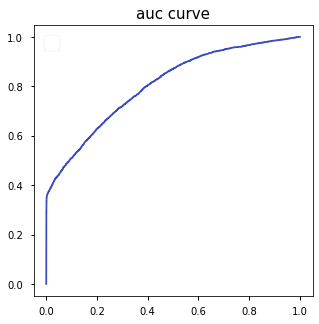

In [258]:
#====== draw auc curve
from sklearn.metrics import roc_curve
y_pred = clf.predict_proba(X_test.values)
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])

fig, ax = plt.subplots(figsize=(5, 5))
ax.legend(fontsize=20)

plt.plot(fpr,tpr,)
# ax.set_xlabel(fontsize=20)
# plt.rcParams.update({'font.size': 15})
# ax.pie(data,labels=labels,explode=explode,autopct='%1.1f%%',shadow=False,startangle=150,textprops= {'fontsize':15})
plt.title("auc curve",fontsize = 15)
plt.show()  

In [259]:
y_pred[:,1]

array([0.84402452, 0.06470054, 0.37970632, ..., 0.4823928 , 0.76070907,
       0.02328884])

In [0]:
y_pred_ = y_pred[:,1] > 0.9

In [266]:
outcome = pd.DataFrame(y_test)
outcome.columns = ['y_test']
outcome['y_pred'] = y_pred_
outcome

,y_test,y_pred
subid,,
21064762,1,False
27683025,0,False
22074484,1,False
28299285,0,False
22049440,1,False
...,...,...
22453852,1,False
29972795,0,False
22287448,1,False


In [267]:
churn_churn = len(outcome.loc[(outcome['y_test'] == 1) & (outcome['y_pred'] == 1)]) / len(outcome)
churn_renew = len(outcome.loc[(outcome['y_test'] == 0) & (outcome['y_pred'] == 1)]) / len(outcome)
renew_churn = len(outcome.loc[(outcome['y_test'] == 1) & (outcome['y_pred'] == 0)]) / len(outcome)
renew_renew = len(outcome.loc[(outcome['y_test'] == 0) & (outcome['y_pred'] == 0)]) / len(outcome)

print (churn_churn,churn_renew, renew_churn, renew_renew)

0.10608095146748513 0.00012788541466845707 0.29100326107807406 0.6027879020397724


#### Try xgboost

In [0]:
#====== modelling with XGBoost
#====== mainly use hyperopt to conduct model tuning

def objective(space):

#=== choose XGBoost
    classifier = xgb.XGBClassifier(n_estimators = space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            gamma = space['gamma'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree = space['colsample_bytree']
                            )

    # applying k-Fold Cross Validation to optimize roc_auc
    acc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring='roc_auc')
    CrossValMean = acc.mean()

    return{'loss':1-CrossValMean, 'status': STATUS_OK }

#=== decide the range of params
space = {
    'max_depth' : hp.choice('max_depth', range(5, 30, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(20, 205, 5)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)
#=== print the best outcome
print("Best: ", best)

In [0]:
classifier = XGBClassifier(n_estimators = best['n_estimators'],
                            max_depth = best['max_depth'],
                            learning_rate = best['learning_rate'],
                            gamma = best['gamma'],
                            min_child_weight = best['min_child_weight'],
                            subsample = best['subsample'],
                            colsample_bytree = best['colsample_bytree']
                            )

#====== Applying k-Fold Cross Validation and see the outcome
acc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring='roc_auc')
CrossValMean = acc.mean()
print("Final CrossValMean: ", CrossValMean)

CrossValSTD = acc.std()
print("Final CrossValstd: ", CrossValSTD)


In [0]:
#====== Make prediction and output confusion matrix
clf = classifier.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

##CLV

In [196]:
#====== generate prob for each customer

clf = classifier.fit(X, y)
y_pred = clf.predict_proba(X)

df_3 = df_2.copy()
df_3['Churn_prob'] = y_pred[:,1]

#====== find the group
df_3 = df_3.loc[df_3['Churn_TF'] == 0]
df_3 = df_3[['discount_price','revenue_net_1month','Churn_prob']]
df_3

,discount_price,revenue_net_1month,Churn_prob
subid,,,
29726122,4.5141,4.5875,0.367450
20299962,4.5141,3.4498,0.412149
26874196,4.5141,4.5875,0.550192
29773460,4.5141,4.5875,0.363882
21447938,4.5141,4.5875,0.393285
...,...,...,...
27161457,4.5141,4.5875,0.047075
29190645,4.5141,4.5875,0.383190
26828621,4.5141,-0.6973,0.408767


In [197]:
#====== bring back the cac info to calculate clf
df_3['account_creation_date'] = subscribers.loc[df_3.index,'account_creation_date']

attribution = attribution[['attribution_survey','attribution_technical_new']]

df_3 = pd.merge(left = df_3, right = attribution, left_index = True, right_index = True, how = 'inner')

df_3

,discount_price,revenue_net_1month,Churn_prob,account_creation_date,attribution_survey,attribution_technical_new
subid,,,,,,
29726122,4.5141,4.5875,0.367450,2020-02-19 18:30:15,search,bing
20299962,4.5141,3.4498,0.412149,2020-03-05 14:52:22,referral,email
26874196,4.5141,4.5875,0.550192,2020-03-09 03:09:57,facebook,facebook
29773460,4.5141,4.5875,0.363882,2020-03-18 23:06:25,facebook,facebook
21447938,4.5141,4.5875,0.393285,2019-12-20 17:41:28,facebook,display
...,...,...,...,...,...,...
27161457,4.5141,4.5875,0.047075,2019-11-09 11:35:35,facebook,facebook
29190645,4.5141,4.5875,0.383190,2020-03-02 22:42:33,social_organic,search
26828621,4.5141,-0.6973,0.408767,2020-02-26 02:12:05,facebook,email


In [198]:
CAC_df

,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
date,,,,,,,,
2019-06-30,55.515548,493.421053,209.696970,222.916667,247.916667,200.000000,114.563107,73.053892
2019-07-31,4.635710,46.883721,18.502674,20.659554,23.928215,40.134680,6.352567,4.958678
2019-08-31,3.978094,49.689847,13.163636,22.866345,15.680616,69.957537,7.515152,4.886813
2019-09-30,5.038560,63.192997,14.189189,28.381079,26.688365,93.825589,9.022556,5.059829
2019-10-31,4.276247,66.608238,13.051585,26.918239,25.985091,67.082035,8.422376,4.712718
2019-11-30,3.592239,59.296875,12.610489,21.481850,31.750339,31.460674,8.659794,4.355609
2019-12-31,4.314433,57.651515,13.272690,18.347107,32.570659,17.156863,7.578947,4.617605
2020-01-31,5.576737,65.766551,12.739336,17.461538,22.016936,17.142857,7.262873,4.147982
2020-02-29,4.869684,49.772580,10.923607,18.943693,16.891892,9.677419,8.116677,3.354839


In [215]:
from datetime import timedelta
df_3['format_date'] = pd.to_datetime(df_3['account_creation_date'],format='%Y-%m')
df_3['format_date'] = df_3['format_date'].apply(lambda x: x.strftime('%Y-%m'))
df_3['format_date'] = pd.to_datetime(df_3['format_date'],format = '%Y-%m')
df_3

,discount_price,revenue_net_1month,Churn_prob,account_creation_date,attribution_survey,attribution_technical_new,format_date
subid,,,,,,,
29726122,4.5141,4.5875,0.367450,2020-02-19 18:30:15,search,bing,2020-02-01
20299962,4.5141,3.4498,0.412149,2020-03-05 14:52:22,referral,email,2020-03-01
26874196,4.5141,4.5875,0.550192,2020-03-09 03:09:57,facebook,facebook,2020-03-01
29773460,4.5141,4.5875,0.363882,2020-03-18 23:06:25,facebook,facebook,2020-03-01
21447938,4.5141,4.5875,0.393285,2019-12-20 17:41:28,facebook,display,2019-12-01
...,...,...,...,...,...,...,...
27161457,4.5141,4.5875,0.047075,2019-11-09 11:35:35,facebook,facebook,2019-11-01
29190645,4.5141,4.5875,0.383190,2020-03-02 22:42:33,social_organic,search,2020-03-01
26828621,4.5141,-0.6973,0.408767,2020-02-26 02:12:05,facebook,email,2020-02-01


In [210]:
CAC_df_1 = CAC_df.copy()
CAC_df_1['time'] = CAC_df_1.index
CAC_df_1['time']= CAC_df_1['time'].apply(lambda x: x.strftime('%Y-%m'))
CAC_df_1['time'] = pd.to_datetime(CAC_df_1['time'],format = '%Y-%m')
CAC_df_1.set_index(keys = 'time',drop = True, inplace = True)
CAC_df_1

,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
time,,,,,,,,
2019-06-01,55.515548,493.421053,209.696970,222.916667,247.916667,200.000000,114.563107,73.053892
2019-07-01,4.635710,46.883721,18.502674,20.659554,23.928215,40.134680,6.352567,4.958678
2019-08-01,3.978094,49.689847,13.163636,22.866345,15.680616,69.957537,7.515152,4.886813
2019-09-01,5.038560,63.192997,14.189189,28.381079,26.688365,93.825589,9.022556,5.059829
2019-10-01,4.276247,66.608238,13.051585,26.918239,25.985091,67.082035,8.422376,4.712718
2019-11-01,3.592239,59.296875,12.610489,21.481850,31.750339,31.460674,8.659794,4.355609
2019-12-01,4.314433,57.651515,13.272690,18.347107,32.570659,17.156863,7.578947,4.617605
2020-01-01,5.576737,65.766551,12.739336,17.461538,22.016936,17.142857,7.262873,4.147982
2020-02-01,4.869684,49.772580,10.923607,18.943693,16.891892,9.677419,8.116677,3.354839


In [0]:
col = CAC_df_1.columns.to_list()
col
def approach(array_like):
  time = array_like['format_date']
  mapping = CAC_df_1.loc[time]
  expense = 0

  survey = array_like['attribution_survey']
  technical = array_like['attribution_technical_new']
  if survey in col:
    expense += mapping[survey]
  if technical in col:
    expense += mapping[technical]
  return expense

In [0]:
expenses = df_3.apply(lambda x: approach(x),axis = 1)
df_3['expenses'] = expenses

In [222]:
df_3 = df_3[['discount_price','revenue_net_1month','expenses','Churn_prob']]
df_3

,discount_price,revenue_net_1month,expenses,Churn_prob
subid,,,,
29726122,4.5141,4.5875,10.923607,0.367450
20299962,4.5141,3.4498,51.739132,0.412149
26874196,4.5141,4.5875,10.628856,0.550192
29773460,4.5141,4.5875,10.628856,0.363882
21447938,4.5141,4.5875,4.314433,0.393285
...,...,...,...,...
27161457,4.5141,4.5875,7.184478,0.047075
29190645,4.5141,4.5875,10.607477,0.383190
26828621,4.5141,-0.6973,54.642264,0.408767


In [236]:
# present value of revenue_net_1month (considering joint fee) + present value of annuity (discount_price) - expenses(CAC)
# adopt 10% annual discount rate
# equalvant monthly discount rate is 0.8%
# df_3['CLV'] = df_3['revenue_net_1month'] / 1.004 + df_3['discount_price'] * (1 - df_3['Churn_prob']) / 0.01 - df_3['expenses']
df_3['CLV'] = df_3['revenue_net_1month'] / 1.004 + df_3['discount_price'] / (1 + 0.008 - 1 + df_3['Churn_prob']) - df_3['expenses']
df_3

,discount_price,revenue_net_1month,expenses,Churn_prob,CLV
subid,,,,,
29726122,4.5141,4.5875,10.923607,0.367450,5.668787
20299962,4.5141,3.4498,51.739132,0.412149,-37.559040
26874196,4.5141,4.5875,10.628856,0.550192,2.027372
29773460,4.5141,4.5875,10.628856,0.363882,6.078908
21447938,4.5141,4.5875,4.314433,0.393285,11.503907
...,...,...,...,...,...
27161457,4.5141,4.5875,7.184478,0.047075,79.347476
29190645,4.5141,4.5875,10.607477,0.383190,5.501165
26828621,4.5141,-0.6973,54.642264,0.408767,-44.505545


In [237]:
df_3['CLV'].sum()

558270.7094352411